# Mushroom dataset
---
#### Name: 劉耀文 (Yao-Wen Liu)
#### Student ID: 0716236
---

## 1. Data Input
### Import libraries and read dataset from file
* Use read_csv() in Pandas to read the dataset from file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import precision_score as ps
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

#read dataset
dataset = pd.read_csv("agaricus-lepiota.data", sep=",", header=None)
feature_list=['cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor',
              'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape',
              'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring',
              'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

## 2. Data Visualization
### Show the data distribution by value frequency of every feature.
* Use np.unique() to find all possible events of each feature and count, then draw them out with plt.bar().<br>
    * I used plt.hist() to draw the figure, but there are some problems, such as the bars is not lining up with the labels.

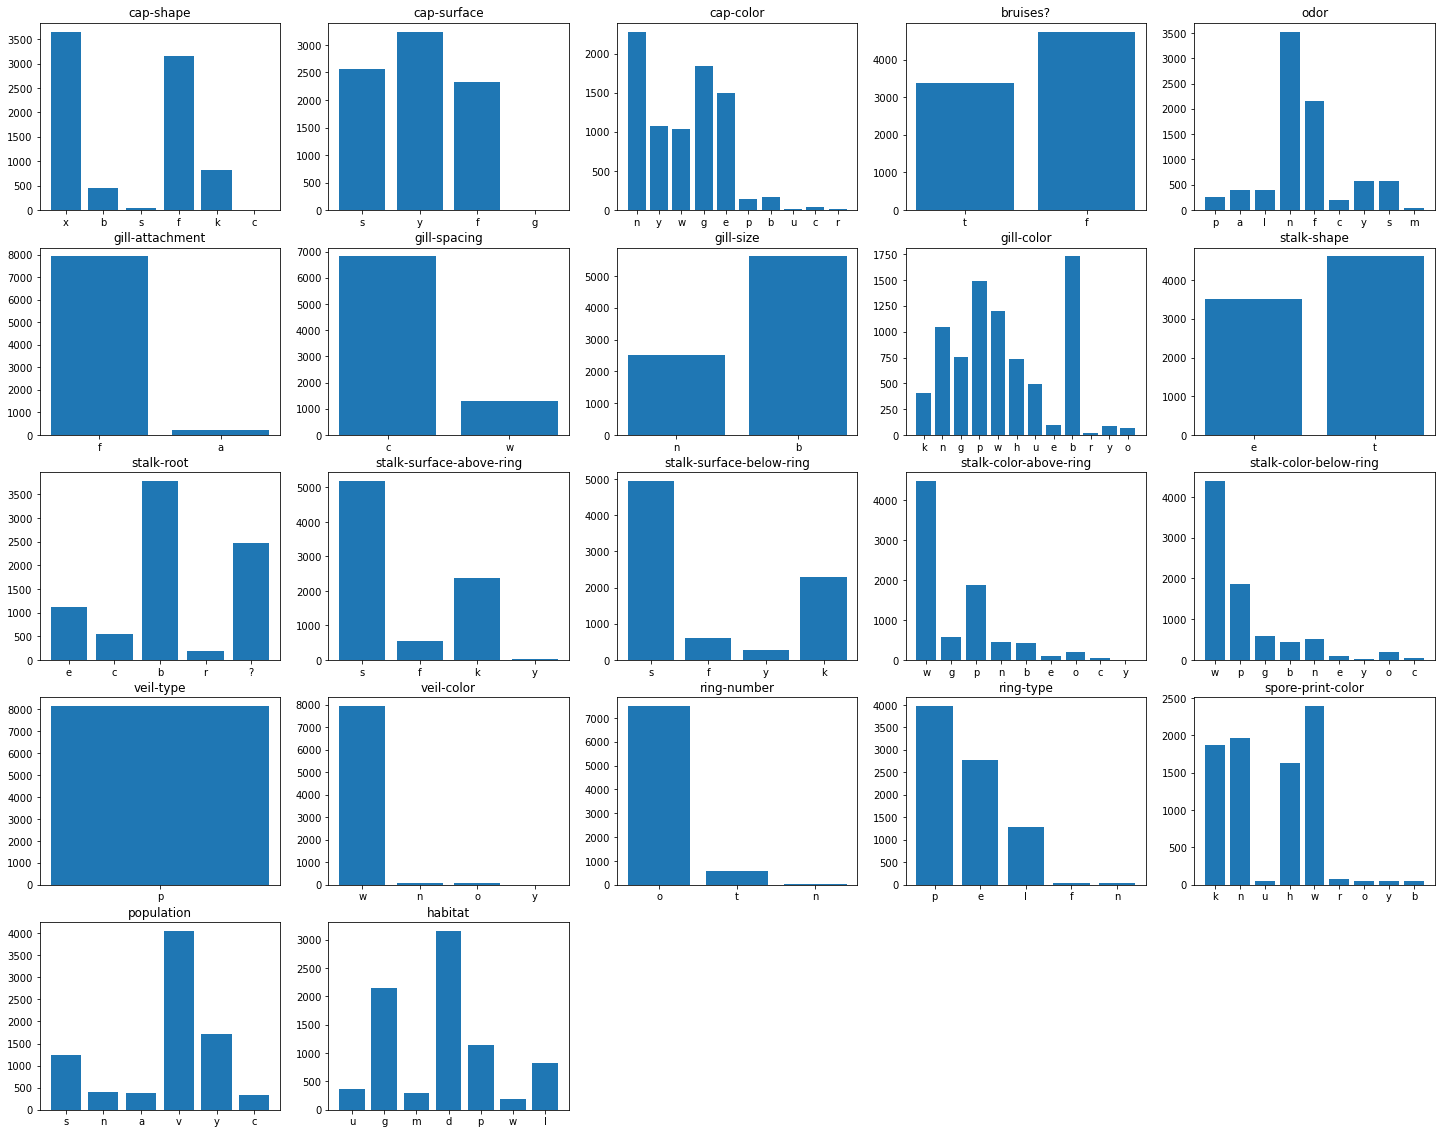

In [2]:
plt.figure(figsize=(25, 20))
for i in range(1,23):
    plt.subplot(5,5,i)
    labels, index=np.unique(dataset[i], return_index=True)
    labels=labels[index.argsort()]
    counts=[]
    for j in range(0,len(labels)):
        counts.append(dataset[i].tolist().count(labels[j]))
    plt.bar(labels, counts)
    plt.title(feature_list[i-1])
plt.show()

### Split data based on their labels (targets) and show the data distribution of each feature.
#### Edible
* Use np.unique() to find all possible events of each feature from dataset and count the elements in the edible_data, then draw them out with plt.bar().

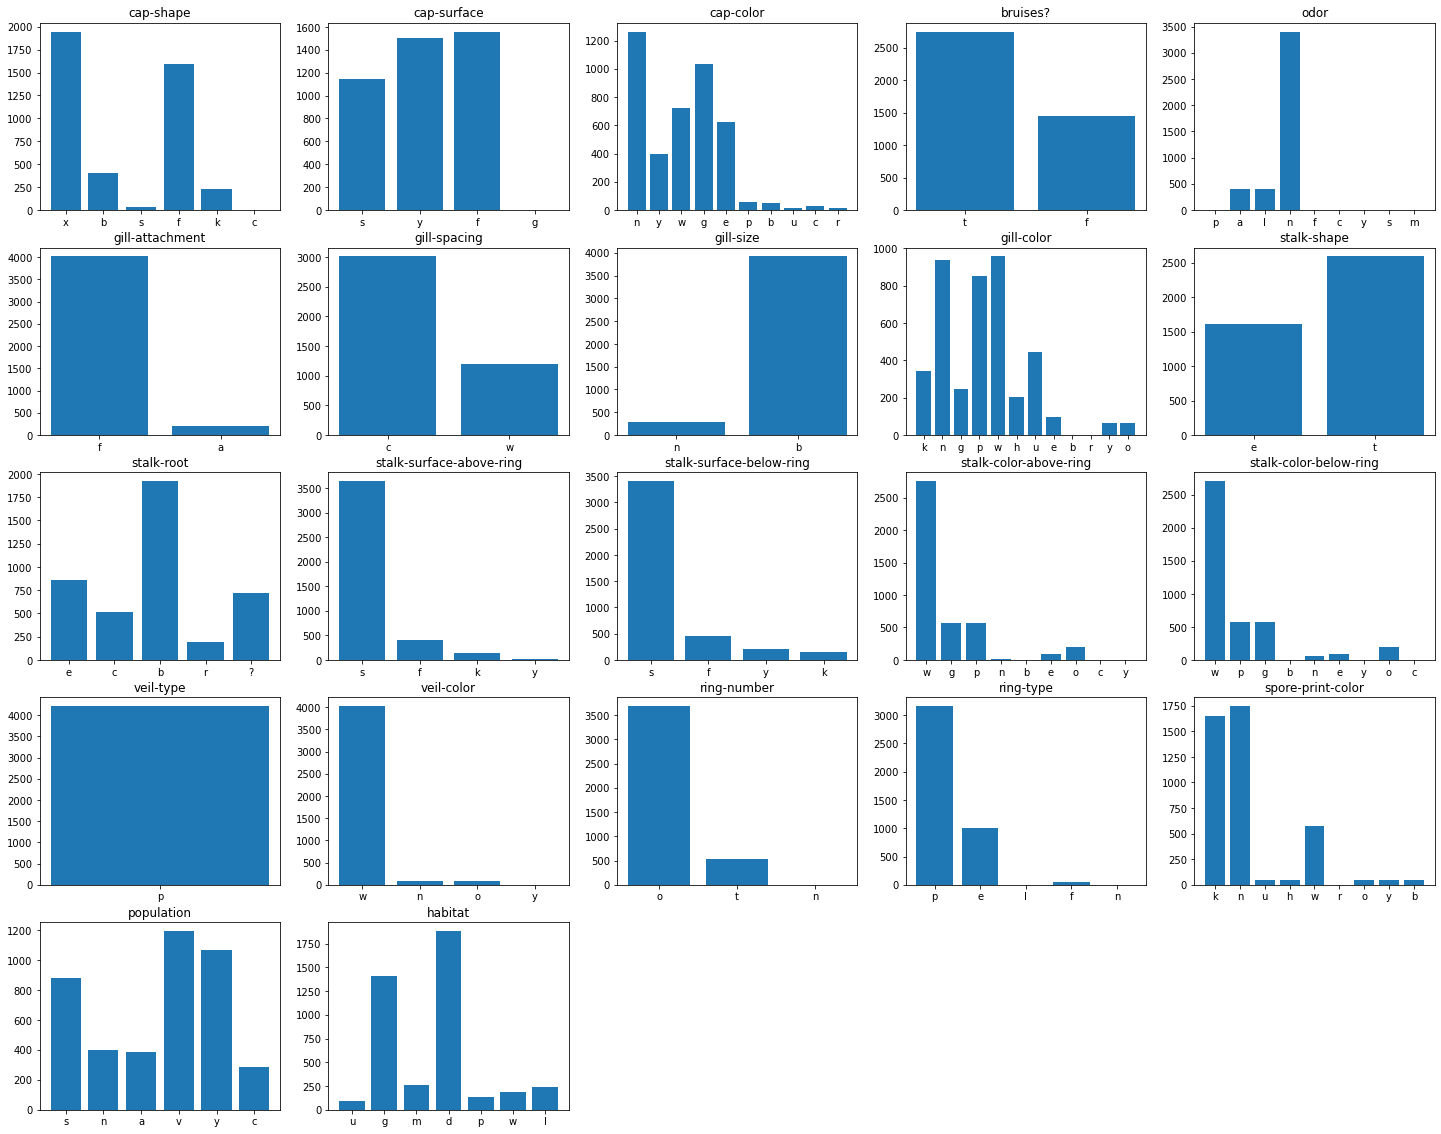

In [3]:
edible_data = dataset[dataset[0] == 'e']
plt.figure(figsize=(25, 20))
for i in range(1,23):
    plt.subplot(5,5,i)
    labels, index=np.unique(dataset[i], return_index=True)
    labels=labels[index.argsort()]
    counts=[]
    for j in range(0,len(labels)):
        counts.append(edible_data[i].tolist().count(labels[j]))
    plt.bar(labels, counts)
    plt.title(feature_list[i-1])
plt.show()

#### Poisonous
* Use np.unique() to find all possible events of each feature from dataset and count the elements in the poisonous_data, then draw them out with plt.bar().

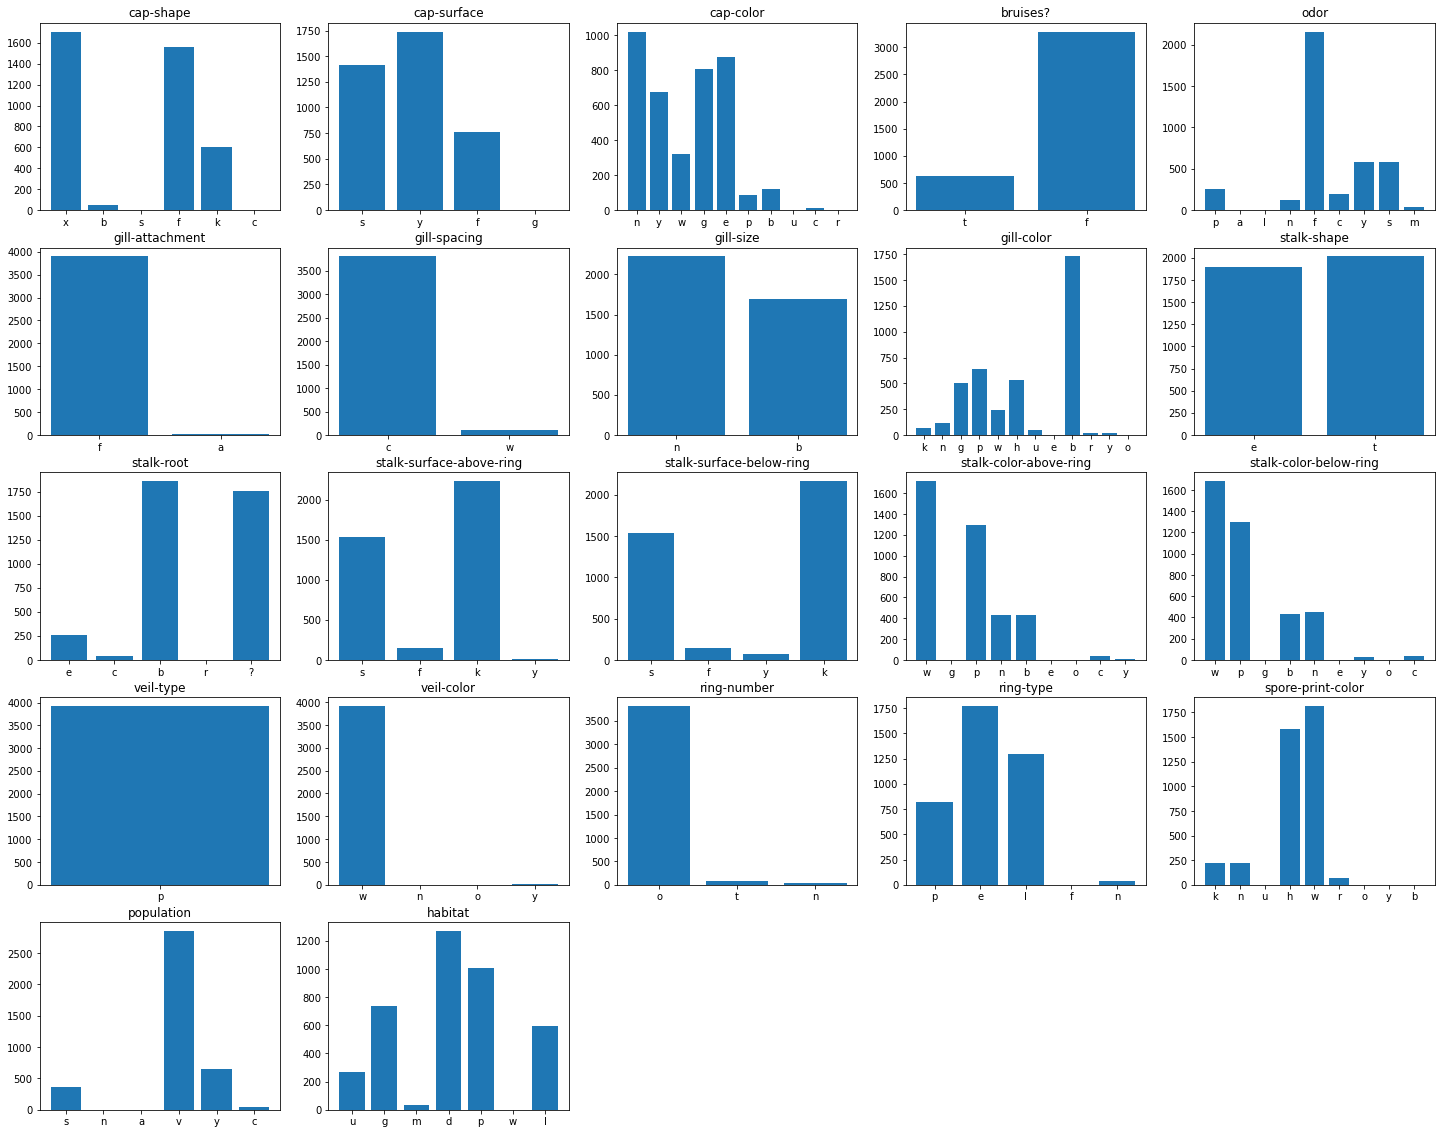

In [4]:
poisonous_data = dataset[dataset[0] == 'p']
plt.figure(figsize=(25, 20))
for i in range(1,23):
    plt.subplot(5,5,i)
    labels, index=np.unique(dataset[i], return_index=True)
    labels=labels[index.argsort()]
    counts=[]
    for j in range(0,len(labels)):
        counts.append(poisonous_data[i].tolist().count(labels[j]))
    plt.bar(labels, counts)
    plt.title(feature_list[i-1])
plt.show()

## 3. Data preprocessing
* Use Dataframe.drop() in Pandas to drop the columns which contains missing values.
* Use LabelEncoder() in scikit-learn to encode the elements in the dataset to fit the model's input.
* Use Dataframe.sample(frac=1) in Pandas to shuffle the data.

In [7]:
# Drop columns with miss value.
dataset.drop(columns=dataset.columns[(dataset == '?').any()], inplace=True)

# Transform data format so your model can process them. (From characters to integers)
labelencoder=LabelEncoder()
for column in dataset.columns:
    dataset[column] = labelencoder.fit_transform(dataset[column])

# Shuffle the data.
processed_data = dataset.sample(frac=1).reset_index(drop=True)
processed_data

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0,5,0,3,0,5,1,1,0,5,...,0,7,7,0,2,1,0,3,0,1
1,0,5,0,2,1,5,1,0,0,10,...,2,6,7,0,2,1,4,3,4,0
2,0,2,3,2,1,5,1,0,0,10,...,2,7,7,0,2,1,4,2,5,0
3,0,2,0,8,0,5,1,1,0,3,...,0,7,7,0,2,1,0,2,3,1
4,1,5,3,9,0,2,1,0,0,2,...,1,4,6,0,2,1,2,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,5,0,3,0,2,1,0,0,2,...,1,4,0,0,2,1,2,1,4,0
8120,0,2,3,3,1,5,1,0,0,5,...,2,6,7,0,2,1,4,2,4,0
8121,1,5,2,2,0,2,1,0,1,0,...,1,6,6,0,2,1,0,7,4,2
8122,0,3,2,0,1,5,1,0,0,1,...,2,2,2,0,2,2,0,7,1,6


## 4. Model Construction
#### Holdout validation without Laplace smoothing
* Use CategoricalNB() in scikit-learn as the training model for our discrete value dataset.
* Use train_test_split() in scikit-learn to split the dataset into two parts, one for training, one for validation.
* User confusion_matrix(), accuracy_score(), recall_score() and precision_score() to evaluate the performance of the model.
    * Call precision_score() directly might cause some problem, so I use ps() to call it when I import the library.

In [17]:
# data spliting
hv_x = processed_data.drop([0], axis=1).values
hv_y = processed_data[0].values
hv_x_train, hv_x_test, hv_y_train, hv_y_test = train_test_split(hv_x,hv_y,test_size=0.3)

# model trainging
hv_nb = CategoricalNB(alpha=1.0e-10)
hv_nb.fit(hv_x_train, hv_y_train)

# model testing
hv_y_predict = hv_nb.predict(hv_x_test)

# training result
hv_mat = confusion_matrix(y_true=hv_y_test, y_pred=hv_y_predict)
hv_accuracy = round(accuracy_score(hv_y_test, hv_y_predict)*100, 2)
hv_recall = round(recall_score(hv_y_test, hv_y_predict)*100, 2)
hv_precision = round(ps(hv_y_test, hv_y_predict)*100, 2)

#### Holdout validation with Laplace smoothing
* Use CategoricalNB() in scikit-learn as the training model for our discrete value dataset.
* Use train_test_split() in scikit-learn to split the dataset into two parts, one for training, one for validation.
* User confusion_matrix(), accuracy_score(), recall_score() and precision_score() to evaluate the performance of the model.
    * Call precision_score() directly might cause some problem, so I use ps() to call it when I import the library.

In [18]:
# data spliting
hvl_x = processed_data.drop([0], axis=1).values
hvl_y = processed_data[0].values
hvl_x_train, hvl_x_test, hvl_y_train, hvl_y_test = train_test_split(hvl_x,hvl_y,test_size=0.3)

# model trainging
hvl_nb = CategoricalNB(alpha=0.5)
hvl_nb.fit(hvl_x_train, hvl_y_train)

# model testing
hvl_y_predict = hvl_nb.predict(hvl_x_test)

# training result
hvl_mat = confusion_matrix(y_true=hvl_y_test, y_pred=hvl_y_predict)
hvl_accuracy = round(accuracy_score(hvl_y_test, hvl_y_predict)*100, 2)
hvl_recall = round(recall_score(hvl_y_test, hvl_y_predict)*100, 2)
hvl_precision = round(ps(hvl_y_test, hvl_y_predict)*100, 2)

#### 3-fold cross-validation without Laplace smoothing
* Use CategoricalNB() in scikit-learn as the training model for our discrete value dataset.
* Use KFold() in scikit-learn to split the data into k-fold to do the cross-validation.
* User confusion_matrix(), accuracy_score(), recall_score() and precision_score() to evaluate the performance of the model.
    * Call precision_score() directly might cause some problem, so I use ps() to call it when I import the library.

In [19]:
cv_x = processed_data.drop([0], axis=1).values
cv_y = processed_data[0].values
cv_k_fold = KFold(n_splits=3)
cv_k_fold.get_n_splits(cv_x)
cv_nb = CategoricalNB(alpha=1.0e-10)

# declare variables that save the performance
cv_accuracy=0.0
cv_recall=0.0
cv_precision=0.0
cv_mat=np.array([[0,0],[0,0]])

for train_index, test_index in cv_k_fold.split(cv_x):
    # get data in this epoch
    cv_x_train, cv_x_test = cv_x[train_index], cv_x[test_index]
    cv_y_train, cv_y_test = cv_y[train_index], cv_y[test_index]
    
    # model training
    cv_nb.fit(cv_x_train, cv_y_train)

    # model testing
    cv_y_predict = cv_nb.predict(cv_x_test)

    # training result
    cv_accuracy = cv_accuracy + accuracy_score(cv_y_test, cv_y_predict)*100
    cv_recall = cv_recall + recall_score(cv_y_test, cv_y_predict)*100
    cv_precision = cv_precision + ps(cv_y_test, cv_y_predict)*100
    cv_mat = cv_mat + confusion_matrix(y_true=cv_y_test, y_pred=cv_y_predict)

# averaging result
cv_mat = (cv_mat/3).astype(int)
cv_accuracy = round(cv_accuracy / 3, 2)
cv_recall = round(cv_recall / 3, 2)
cv_precision = round(cv_precision / 3, 2)

#### 3-fold cross-validation with Laplace smoothing
* Use CategoricalNB() in scikit-learn as the training model for our discrete value dataset.
* Use KFold() in scikit-learn to split the data into k-fold to do the cross-validation.
* User confusion_matrix(), accuracy_score(), recall_score() and precision_score() to evaluate the performance of the model.
    * Call precision_score() directly might cause some problem, so I use ps() to call it when I import the library.

In [20]:
cvl_x = processed_data.drop([0], axis=1).values
cvl_y = processed_data[0].values
cvl_k_fold = KFold(n_splits=3)
cvl_k_fold.get_n_splits(cvl_x)
cvl_nb = CategoricalNB(alpha=0.5)

# declare variables that save the performance
cvl_accuracy=0.0
cvl_recall=0.0
cvl_precision=0.0
cvl_mat=np.array([[0,0],[0,0]])

for train_index, test_index in cvl_k_fold.split(cvl_x):
    # get data in this epoch
    cvl_x_train, cvl_x_test = cvl_x[train_index], cvl_x[test_index]
    cvl_y_train, cvl_y_test = cvl_y[train_index], cvl_y[test_index]
    
    # model training
    cvl_nb.fit(cvl_x_train, cvl_y_train)

    # model testing
    cvl_y_predict = cvl_nb.predict(cvl_x_test)

    # training result
    cvl_accuracy = cvl_accuracy + accuracy_score(cvl_y_test, cvl_y_predict)*100
    cvl_recall = cvl_recall + recall_score(cvl_y_test, cvl_y_predict)*100
    cvl_precision = cvl_precision + ps(cvl_y_test, cvl_y_predict)*100
    cvl_mat = cvl_mat + confusion_matrix(y_true=cvl_y_test, y_pred=cvl_y_predict)

# averaging result
cvl_mat = (cvl_mat/3).astype(int)
cvl_accuracy = round(cvl_accuracy / 3, 2)
cvl_recall = round(cvl_recall / 3, 2)
cvl_precision = round(cvl_precision / 3, 2)

## 6. Results
* Use ConfusionMatrixDisplay() in scikit-learn to plot the confusion matrix of validation result for each model.
* Use plt.subplots() in matplotlib to combine all the figures as one big figure.

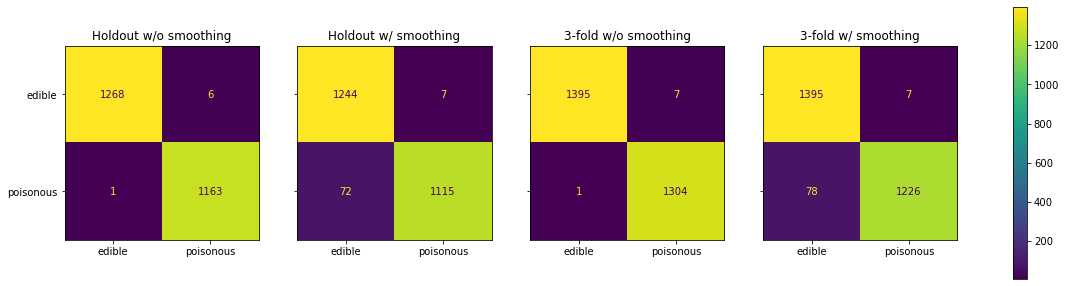


			Accuracy	Sensitivity	Precision
Holdout w/o smoothing	99.71%		99.91%		99.49%
Holdout w/ smoothing	96.76%		93.93%		99.38%
3-fold w/o smoothing	99.7%		99.92%		99.47%
3-fold w/ smoothing	96.84%		93.98%		99.43%


In [21]:
label=['edible', 'poisonous']
f, axes = plt.subplots(1, 4, figsize=(20, 5), sharey='row')

disp = ConfusionMatrixDisplay(hv_mat, display_labels=label)
disp.plot(ax=axes[0])
disp.ax_.set_title('Holdout w/o smoothing')
disp.im_.colorbar.remove()
disp.ax_.set_xlabel('')
disp.ax_.set_ylabel('')


disp = ConfusionMatrixDisplay(hvl_mat, display_labels=label)
disp.plot(ax=axes[1])
disp.ax_.set_title('Holdout w/ smoothing')
disp.im_.colorbar.remove()
disp.ax_.set_xlabel('')
disp.ax_.set_ylabel('')


disp = ConfusionMatrixDisplay(cv_mat, display_labels=label)
disp.plot(ax=axes[2])
disp.ax_.set_title('3-fold w/o smoothing')
disp.im_.colorbar.remove()
disp.ax_.set_xlabel('')
disp.ax_.set_ylabel('')


disp = ConfusionMatrixDisplay(cvl_mat, display_labels=label)
disp.plot(ax=axes[3])
disp.ax_.set_title('3-fold w/ smoothing')
disp.im_.colorbar.remove()
disp.ax_.set_xlabel('')
disp.ax_.set_ylabel('')

f.colorbar(disp.im_, ax=axes)
plt.show()

print("\n\t\t\tAccuracy\tSensitivity\tPrecision")
print("Holdout w/o smoothing\t" + str(hv_accuracy) + "%\t\t" + str(hv_recall) + "%\t\t" + str(hv_precision) + "%")
print("Holdout w/ smoothing\t" + str(hvl_accuracy) + "%\t\t" + str(hvl_recall) + "%\t\t" + str(hvl_precision) + "%")
print("3-fold w/o smoothing\t" + str(cv_accuracy) + "%\t\t" + str(cv_recall) + "%\t\t" + str(cv_precision) + "%")
print("3-fold w/ smoothing\t" + str(cvl_accuracy) + "%\t\t" + str(cvl_recall) + "%\t\t" + str(cvl_precision) + "%")


## 7. Comparison & Conclusion

* Holdout Validation v.s. K-fold cross-validation
    * The performance between holdout validation and k-fold cross-validation is quite similar.
    * I refer that the training sample is enough for holdout validation, so the cross-validation cannot boost the performance any more.


* Laplace smoothing or not
    * We can observe that the accuracy and the sensitivity of models with Laplace smoothing is obviously lower than the models without Laplace smoothing.
    * The Laplace smoothing would slightly share the probability from the high value one to the low value one, which means that the original probability might be changed and makes some mistakes while validating the model.
    * I think that Laplace smoothing makes some "opposite effect" because the training sample is enough then the situation that some event is not happened in training data split is quite few or we can say it is nearly impossible.

## 8. Questions
#### Show 𝑃(𝑋𝑠𝑡𝑎𝑙𝑘−𝑐𝑜𝑙𝑜𝑟−𝑏𝑒𝑙𝑜𝑤−𝑟𝑖𝑛𝑔|𝑌=𝑒) with and without Laplace smoothing by bar charts
The addition is too small comparing to the number of samples, so it would too hard to see the difference of two figure.<br>
So, I use Laplace smoothing with alpha=100 to let the difference more significant, which is not the same as the value I used (alpha = 0.5) in the training.

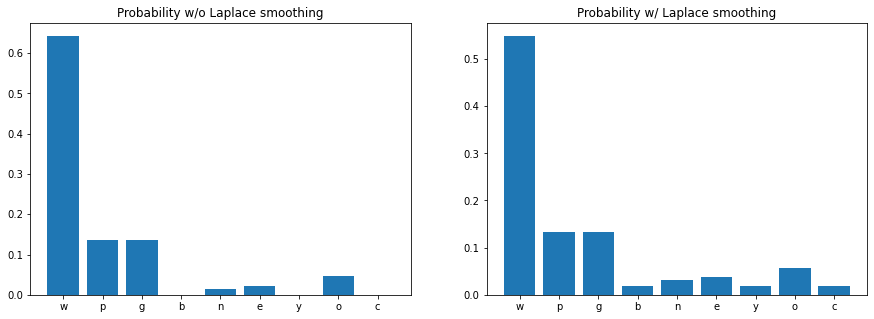

In [23]:
labels = ['w','p','g','b','n','e','y','o','c']
n_y = len(edible_data)
alpha = 100
proba = []
proba_smoothing = []

for i in range(0,len(labels)):
    n_x = edible_data[15].tolist().count(labels[i])
    proba.append(n_x/n_y)
    proba_smoothing.append(((n_x + alpha) / (n_y + alpha * len(labels))))

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)    
plt.bar(labels, proba)
plt.title('Probability w/o Laplace smoothing')
plt.subplot(1,2,2)
plt.bar(labels, proba_smoothing)
plt.title('Probability w/ Laplace smoothing')
plt.show()